In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv("FH.csv")
df["Voltage"] = np.arange(1,92)
df.columns = ["Current", "Voltage"]

currents = list(df["Current"])
voltages = list(df["Voltage"])

In [31]:
maxima = []
for i in range(8, len(currents)):
    if currents[i-1]<currents[i]<currents[i+1]:
        maxima.append(currents[i])

In [32]:
len(maxima)

38

In [36]:
import peakutils
maxima = peakutils.indexes(currents)
maxima =maxima + 1

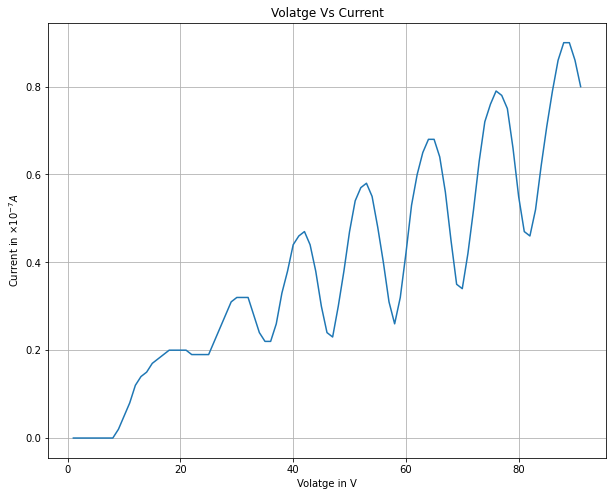

In [18]:
plt.figure(figsize=(10, 8))
plt.plot(df["Voltage"], df["Current"])
plt.grid()
plt.title("Volatge Vs Current")
plt.xlabel("Volatge in V")
plt.ylabel(r"Current in $\times 10^{-7}A$");